In [1]:
import numpy as np
import random
random.seed(43)


import matplotlib.pyplot as plt

In [2]:
#generate random data with seed for reproducibility
#input matrix of shape (1000,4)
np.random.seed(43)
a = np.random.randn(1000,4)

In [3]:
#generate random data with seed for reproducibility
#output vector of shape (1000,1)
np.random.seed(43)
b = np.random.randn(1000,1)

$$J = -\frac{1}{m}\sum\limits_{i=1}^{m}y_i \ln(a_i)+(1-y_i)\ln(1-a_i)$$

$$A = \sigma(w^{T}x + b)$$

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$

$$\frac{\partial J}{\partial b} = \frac{1}{m}\sum\limits_{i=1}^{m}(a_i - y_i)$$

In [4]:
class nn(object):
    """
    Class constructor.
    """
    def __init__(self,x0:np.ndarray,y0:np.ndarray,lr:float=0.001,n_iters:int=1000):
        """
        Constructor method.
        """
        self.x0 = x0
        self.y0 = y0
        assert(type(x0)==np.ndarray and type(y0)==np.ndarray)
        
        
        
        self.lr = lr
        self.n_iters = n_iters
        
        
        self.m, self.n = np.shape(self.x0)[0], np.shape(self.x0)[1]
    
    
        #initialise parameters 
        #weight column vector of shape (4,1)
        self.w = np.random.randn(self.n,1)
        self.b = 0
        
        
    
    
    def create_array(self):
        """Creates a list
        :return:
        :rtype: list
        """
        
        self.array = []
        
        return self.array
    
    
    
    
    def sigmoid(self,z):
        """Non-linear activation function.
        :return: 
        :rtype: 
        """
        return 1/(1+np.exp(-z))
    
    
    
    
    def forward_propagate_vectorised(self):
        """Forward propagation. Vectorised Implementation.
        :return: 
        :rtype: 
        """
    
        #number of cols in first array must equal the number of rows in second array
        if np.shape(self.x0)[1] == np.shape(self.w)[0]:
            
            #matrix multiplication input matrix and weights
            #b is a scalar bias parameter
            #shape (1000,4) and (4,1), then result A of shape (1000,1)
            #pass into static sigmoid function defined above
            A = self.sigmoid(np.matmul(self.x0,self.w)+self.b)
            
            
            #vector A of shape (1000,1) must be equal to (1000,1)
            #to check if A calculated correctly
            if np.shape(A) == (np.size(self.x0,0),np.size(self.w,1)):
            
            
                #cost function J in vectorised form
                #mathematical formula defined above
                cost = (-1/self.m)*np.sum(self.y0*np.log(A)+(1-self.y0)*(np.log(1-A)))
            
            
            
                #calculate gradients of the cost function w.r.t. parameters
                #mathematical formula defined above
                #A is of shape (1000,1)
                #self.y0 output vector is of shape (1000,1)
                #self.x0 is of shape (1000,4)
                #matrix multiplication can only be calc if num of cols if
                #num of cols in first matrix is equal to num of rows in second matrix
                #hence self.x0.T is of shape (4,1000)
                #resulting d_w is then of shape (4,1)
                d_w = (1/self.m)*np.matmul(self.x0.T,(A-self.y0))
                
                #divide by 1 over num of samples
                d_b = (1/self.m)*np.sum(A-self.y0)
        
                #store gradients in a dict
                gradients = {
                        "d_w":d_w,
                        "d_b":d_b
                    }
                
             
            else:
                print(f"must be of shape ({np.size(self.x0,0)},{np.size(self.w,1)})")
                
        #number of cols in first array not equal the number of rows in second array
        #matrix multiplication cannot be calculated
        else:
            
            print(f"{np.shape(self.x0)[1]} not equal to {np.shape(self.w)[0]}")
        
        
        
        return cost, gradients
    
    
    
    
    def forward_propagate_not_vectorised(self):
        """Forward propagation. Non-Vectorised Implementation.
        :return: 
        :rtype: 
        """
        
        #matrix multiplication input matrix of shape (1000,4) and weight column vector (4,1)
        #resulting vector B_p is then of shape (1000,1)
        #hence first initialise B_p to zeros of shape (1000,1)
        B_p = np.zeros(
                (np.size(self.x0,0),np.size(self.w,1))
            )
        
        
        #number of cols in first array must equal the number of rows in second array
        #if true, then matrix multiplication of self.x0 and self.w
        if np.shape(self.x0)[1] == np.shape(self.w)[0]:
        
        
            for i in range(len(self.x0)):
        
                for j in range(len(self.w[0])):
        
                    for k in range(len(self.w)):
        
                        B_p[i][j] += self.x0[i][k]*self.w[k][j]
        
            #add scalar bias term to the result and pass to sigmoid function
            #B of shape (1000,1)
            B = self.sigmoid(B_p + self.b)
            
        
        
        
        
        
        #cost function J in non-vectorised form
        #mathematical formula defined above
        #c_ is equal to cost J, iterate over every sample
        #self.y0 and B are both of shape (1000,1)
        #result c_ is a scalar because it is not indexed by m
        c_ = 0
        for m in range(self.m):
            c_ += (self.y0[m]*np.log(B[m])+(1-self.y0[m])*(np.log(1-B[m])))
        
        
        cost = (-1/self.m)*c_
        cost = float(cost)
        
        
        
        
        #derivative of the cost function w.r.t. w in non-vectorised form
        #first matrix substraction B - self.y0, both shape (1000,1)
        #result K also of shape (1000,1)
        #initialise K with zeros of shape (1000,1)
        
        K = np.zeros(
                (np.size(B,0),np.size(self.y0,1))
            )
        
        for u in range(self.m):
            K[u] += B[u] - self.y0[u]
        
        
        #K is of shape (1000,1) and self.x0 of shape (1000,4)
        #transpose self.x0 for matrix multiplication in non-vectorised form
        #then self.x0.T of shape (4,1000) and K of shape (1000,1)
        #resulting L is of shape (4,1)
        
        L = np.zeros((np.size(self.x0.T,0),np.size(K,1)))
        
        for m in range(len(self.x0.T)):
        
            for n in range(len(K[0])):
        
                for k in range(len(K)):
        
                    L[m][n] += self.x0.T[m][k]*K[k][n]
        
        
        d_w1 = (1/self.m)*L
        
        
        
        
        #derivative of the cost function w.r.t. b in non-vectorised form
        # result is a scalar hence initialise to zero
        #notice d_b1 is not indexed by e
        #iterate over each row in input data
        #both B and self.y0 are of shape (1000,1)
        d_b1 = 0
        
        for e in range(self.m):
            
            d_b1 += B[e]-self.y0[e]
        
        d_b1 = (1/self.m)*d_b1
        d_b1 = float(d_b1)
        
        
        #store gradients in a dict
        gradients = {
                "d_w1":d_w1,
                "d_b1":d_b1
            }
        
        return cost, gradients
    
    
    
    
    
    
    def gradient_descent(self):
        """The below functions runs gradient descent.
        :return: Optimal parameters w,b
        :rtype: np.array
        """
        
        costs = self.create_array()
        
        
        for i in range(self.n_iters):
                
            j, k = self.forward_propagate_vectorised()
            
            self.w = self.w - self.lr*k["d_w"]
            self.b = self.b - self.lr*k["d_b"]
    
            costs.append(j)
            
            if i % 100 ==0:
                print(f"Costs after iter {i}:{j}")
        
        optim_params = {
            "w": self.w,
            "b": self.b
            }
        
        plt.plot(costs)
        
        return optim_params

In [5]:
neural_nets = nn(a,b,0.005,2500)

In [6]:
neural_nets.w

array([[0.7991071 ],
       [0.21605666],
       [0.99981016],
       [0.63657201]])

In [7]:
neural_nets.forward_propagate_vectorised()

(0.9364638761160147,
 {'d_w': array([[0.13694411],
         [0.03113021],
         [0.22317942],
         [0.10489103]]),
  'd_b': 0.5094444540829945})

In [8]:
neural_nets.forward_propagate_not_vectorised()

(0.9364638761160151,
 {'d_w1': array([[0.13694411],
         [0.03113021],
         [0.22317942],
         [0.10489103]]),
  'd_b1': 0.5094444540829937})

Costs after iter 0:0.9364638761160147
Costs after iter 100:0.7803255531585063
Costs after iter 200:0.6509218172574857
Costs after iter 300:0.5456683422196734
Costs after iter 400:0.4612434451386572
Costs after iter 500:0.39406150223948505
Costs after iter 600:0.3406993328908312
Costs after iter 700:0.2981677564601786
Costs after iter 800:0.26401617462743593
Costs after iter 900:0.23631838671023508
Costs after iter 1000:0.2135987513297842
Costs after iter 1100:0.1947417565159418
Costs after iter 1200:0.1789078765441063
Costs after iter 1300:0.1654642564759676
Costs after iter 1400:0.15393114763640522
Costs after iter 1500:0.1439419197826715
Costs after iter 1600:0.13521372798584394
Costs after iter 1700:0.1275261481835068
Costs after iter 1800:0.12070562566821398
Costs after iter 1900:0.1146141145793622
Costs after iter 2000:0.1091407278782687
Costs after iter 2100:0.10419555264293158
Costs after iter 2200:0.0997050297377399
Costs after iter 2300:0.09560847095995492
Costs after iter 240

{'w': array([[0.27804286],
        [0.02444421],
        [0.06776185],
        [0.1587318 ]]),
 'b': -2.468142975034734}

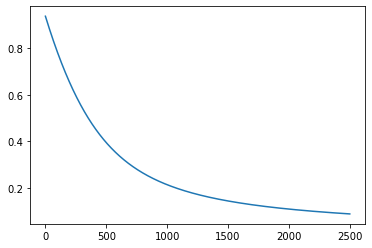

In [9]:
neural_nets.gradient_descent()